<img src="https://s3-sa-east-1.amazonaws.com/preditiva.ai/diversos/preditiva_assinatura.jpg">

# Detecção de Anomalias

Referências adicionais:
- Artigos no Towards Data Science: https://towardsdatascience.com/tagged/anomaly-detection

## Importação das bibliotecas

In [1]:
# Pacotes de preparação dos dados
import numpy as np
import pandas as pd

# Pacotes gráficos
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('module://ipykernel.pylab.backend_inline')

import seaborn as sns
sns.set(rc={'figure.figsize':(8,8)})

# Pacotes de modelagem
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Métricas de Desempenho
import preditiva

## Importação da base de dados

In [2]:
df = pd.read_csv('deteccao_anomalias.csv')
df

0         1         2         3         4         5         6  \
0    3.892732  2.805184  2.550995  3.552799  3.535617  2.603377  3.009781   
1    1.867794  2.885903  3.659853  2.752102  3.210260  3.652755  3.651733   
2    2.126418  2.937117  2.658385  2.909886  3.220593  2.977872  3.352517   
3    2.281768  3.393792  3.024621  3.289367  0.779542  3.823192  3.095105   
4    3.313792  3.177770  3.301764  3.849597  2.513286  2.708374  3.763043   
..        ...       ...       ...       ...       ...       ...       ...   
995  2.211859  0.974738  0.609516  2.583507 -2.662641  1.341302 -0.796160   
996  0.469647 -1.757735 -2.503530  0.918463 -1.578506  2.575295  0.648889   
997 -2.635005 -1.495617  2.511394  2.705099 -1.423784 -2.239450 -1.411934   
998  0.390435  2.105834 -2.197967 -0.400681 -2.196741  2.076853  2.182418   
999  1.014728  1.848913 -2.654379  1.075977 -1.387946 -1.448064  0.395277   

            7         8         9  ...        15        16        17  \
0    1.602563  3.716597  3.618090  ...  3.180136  3.823225  2.036110   
1    3.538190  2.923924  3.077710  ...  3.022520  1.707063  3.154401   
2    3.963114  2.392945  2.956167  ...  2.288016  3.132026  3.439118   
3    3.102520  2.732004  3.478154  ...  2.359537  2.635657  3.508827   
4    2.201730  3.545516  1.934038  ...  1.866877  3.029331  3.246031   
..        ...       ...       ...  ...       ...       ...       ...   
995  1.054585  0.458406  1.800604  ...  1.877293  1.511087  0.873177   
996 -2.139259 -2.326046 -2.134938  ... -0.339749 -1.424025 -2.572856   
997  2.090413  0.308657  1.752524  ... -2.378957  0.797090 -1.937748   
998  2.038850 -2.689084  0.271326  ... -1.497444 -0.999955 -0.022110   
999  0.907109  2.185660 -2.759624  ...  2.522652 -2.693412  0.086128   

           18        19        20        21        22        23        24  
0    2.873729  2.591260  3.120523  3.344853  3.821352  2.707572  3.420944  
1    2.440974  2.914762  3.011396  3.470705  3.134136  3.524040  2.099103  
2    2.510588  3.287913  3.438811  3.326202  2.422843  4.251105  3.141422  
3    2.948938  2.785173  3.329181  2.333904  2.681042  3.181453  3.353012  
4    2.845200  2.615102  2.574489  3.271836  1.938838  3.245325  2.701329  
..        ...       ...       ...       ...       ...       ...       ...  
995 -1.821559 -1.523306 -1.926160 -0.060328  2.254641  1.851757 -2.012679  
996 -2.272076  0.836152  0.950657 -0.595801  2.860336  2.449265 -0.202052  
997 -2.573453  2.549304  1.212691  1.387468  1.284616  1.470192 -2.688626  
998  1.288732  0.643580  2.225287  1.056967  2.423334 -1.694791 -2.356658  
999 -0.435399 -2.678458  0.462684  2.615541 -2.178734 -2.831575 -0.461725  

[1000 rows x 25 columns]

## Preparação dos Dados

### Missing Values

In [3]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
dtype: int64

### Duplicações

In [4]:
df.duplicated().sum()

0

### Tipos de Variáveis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1000 non-null   float64
 1   1       1000 non-null   float64
 2   2       1000 non-null   float64
 3   3       1000 non-null   float64
 4   4       1000 non-null   float64
 5   5       1000 non-null   float64
 6   6       1000 non-null   float64
 7   7       1000 non-null   float64
 8   8       1000 non-null   float64
 9   9       1000 non-null   float64
 10  10      1000 non-null   float64
 11  11      1000 non-null   float64
 12  12      1000 non-null   float64
 13  13      1000 non-null   float64
 14  14      1000 non-null   float64
 15  15      1000 non-null   float64
 16  16      1000 non-null   float64
 17  17      1000 non-null   float64
 18  18      1000 non-null   float64
 19  19      1000 non-null   float64
 20  20      1000 non-null   float64
 21  21      1000 non-null   float64
 22  2

## Análise Exploratória dos Dados

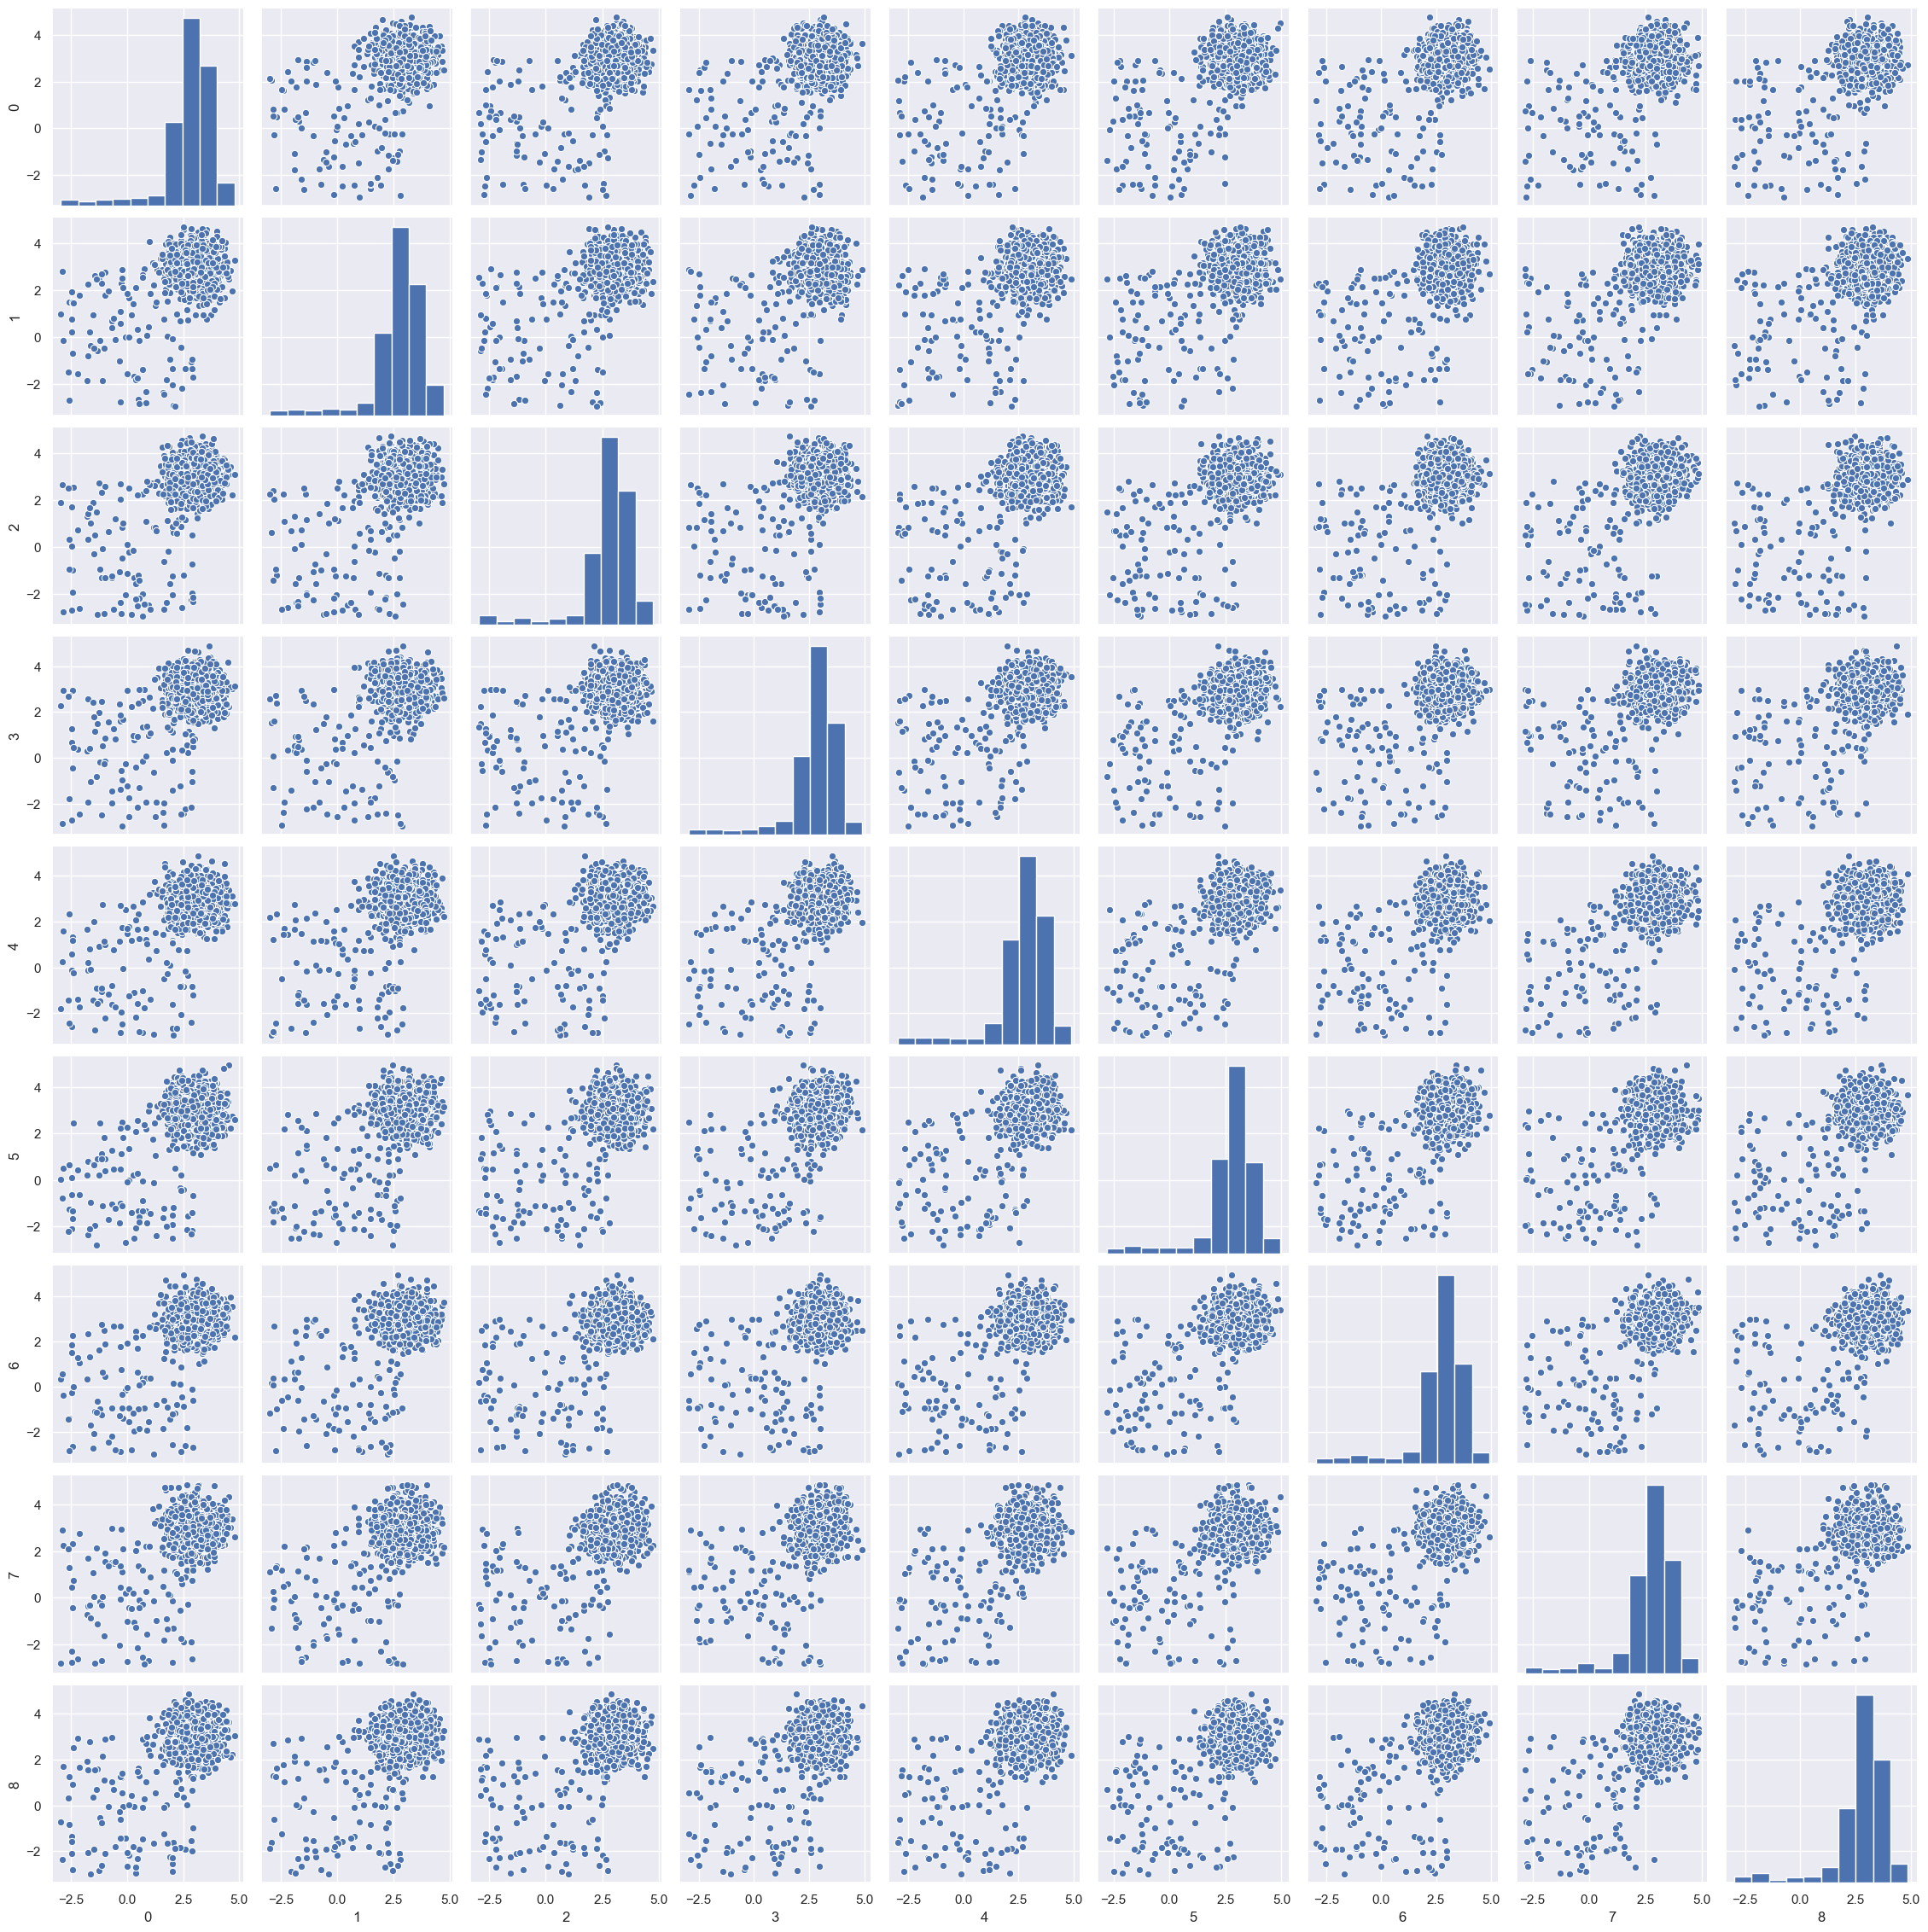

In [6]:
sns.pairplot(df.iloc[:, 0:9]);

### Relatórios Pandas Profiling e SweetViz

In [7]:
perfil_pp, perfil_sv = preditiva.gera_relatorios_aed(df=df)
sns.reset_defaults()

:0:                                |▊                    | [  4%]   00:00  -> (00:00 left)

:FEATURES DONE:                    |█████████████████████| [100%]   00:07  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!
Report base_aed_sv.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


## Preparação dos Dados

### Separação das bases em Treino e Teste

In [8]:
# Seleção das variáveis
x = df.iloc[:,0:25]

# Separação da base em treino e teste
x_train, x_test = train_test_split(x, 
                                   test_size=0.30,
                                   random_state=42)

### Padronização da Escala

In [9]:
# Padronização da Escala
x_scaler = StandardScaler()
x_scaler.fit(x_train)

x_train_scaled = x_scaler.transform(x_train)
x_test_scaled  = x_scaler.transform(x_test)

# Desenvolvimento do Modelo: Isolation Forest

In [10]:
# Treinamento de um modelo Isolation Forest
modelo_if = IsolationForest(n_estimators=100,
                            max_samples=0.5,
                            contamination='auto',
                            max_features=0.5,
                            n_jobs=6,                            
                            random_state=42
                           )

modelo_if.fit(x_train_scaled)

IsolationForest(max_features=0.5, max_samples=0.5, n_jobs=6, random_state=42)

## Aplicação do modelo nas bases de Treino e Teste

In [11]:
# Escoragem dos DataFrames de Treino e Teste
if_train_anomaly_score = modelo_if.decision_function(x_train_scaled)
if_train_outlier_pred = modelo_if.predict(x_train_scaled)

if_test_anomaly_score = modelo_if.decision_function(x_test_scaled)
if_test_outlier_pred = modelo_if.predict(x_test_scaled)


# Construção dos DataFrames de Resultados
if_train = pd.concat([pd.DataFrame(if_train_outlier_pred, 
                                   columns=['outlier_pred'], 
                                   index=x_train.index),
                      pd.DataFrame(if_train_anomaly_score, 
                                   columns=['anomaly_score'], 
                                   index=x_train.index)],
                     axis=1)

if_test = pd.concat([pd.DataFrame(if_test_outlier_pred, 
                                  columns=['outlier_pred'], 
                                  index=x_test.index),
                     pd.DataFrame(if_test_anomaly_score, 
                                  columns=['anomaly_score'], 
                                  index=x_test.index)],
                    axis=1)

In [12]:
if_train

outlier_pred  anomaly_score
541             1       0.099812
440             1       0.101057
482            -1      -0.091252
422             1       0.134687
778             1       0.090363
..            ...            ...
106             1       0.083594
270             1       0.133057
860             1       0.114643
435             1       0.076187
102             1       0.117277

[700 rows x 2 columns]

## Avaliação dos Resultados

### Distribuição do Score de Anomalia

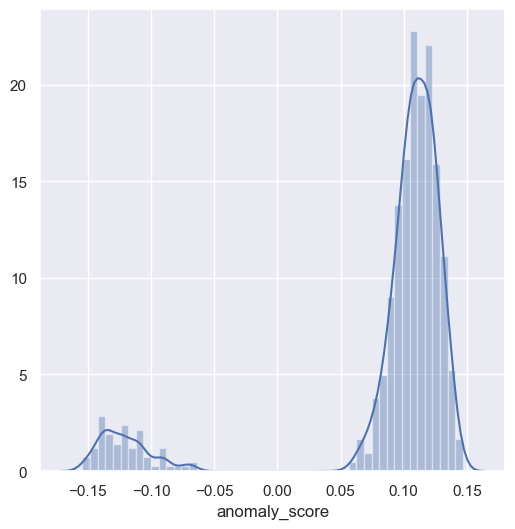

In [20]:
%matplotlib inline
# Distribuição dos scores
sns.distplot(if_train['anomaly_score']);

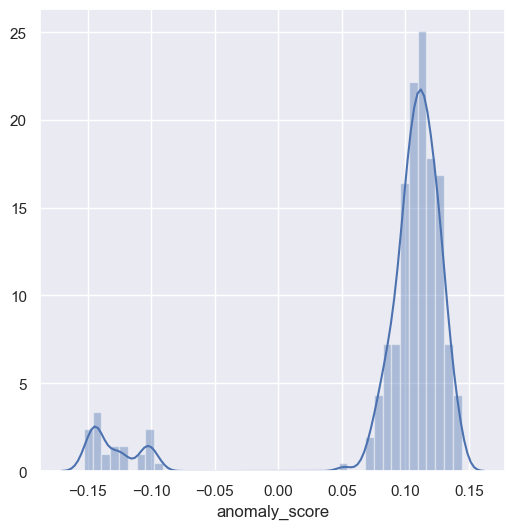

In [21]:
# Distribuição dos scores
sns.distplot(if_test['anomaly_score']);

### Distribuição do Score de Anomalia por Classe de Predição

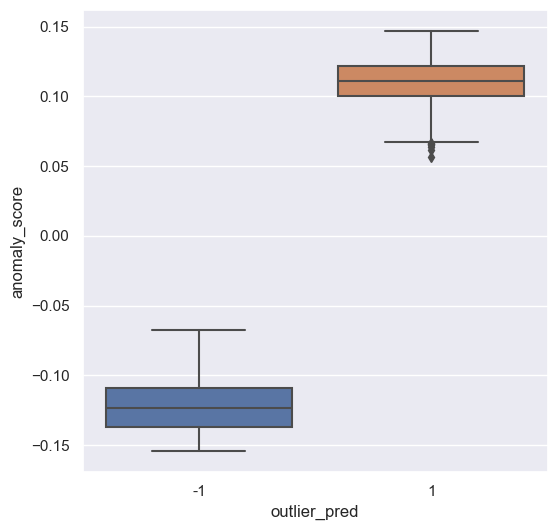

In [22]:
# Distribuição dos scores por classe de predição
sns.set(rc={'figure.figsize':(6,6)})

sns.boxplot(x='outlier_pred',
            y='anomaly_score',
            data=if_train);

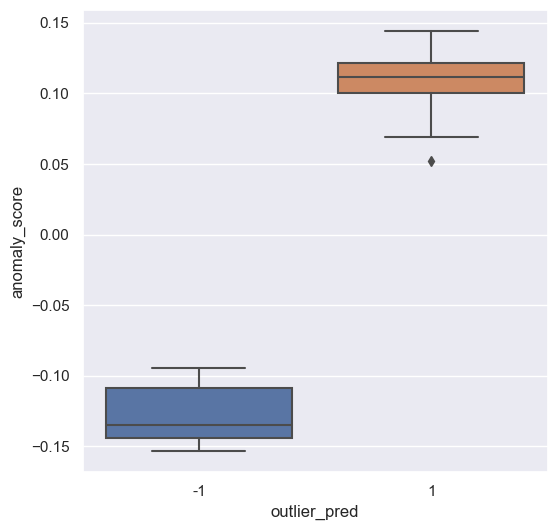

In [23]:
# Distribuição dos scores por classe de predição
sns.set(rc={'figure.figsize':(6,6)})

sns.boxplot(x='outlier_pred',
            y='anomaly_score',
            data=if_test);

### Avaliação dos Resultados: Dispersão por Classe de Predição

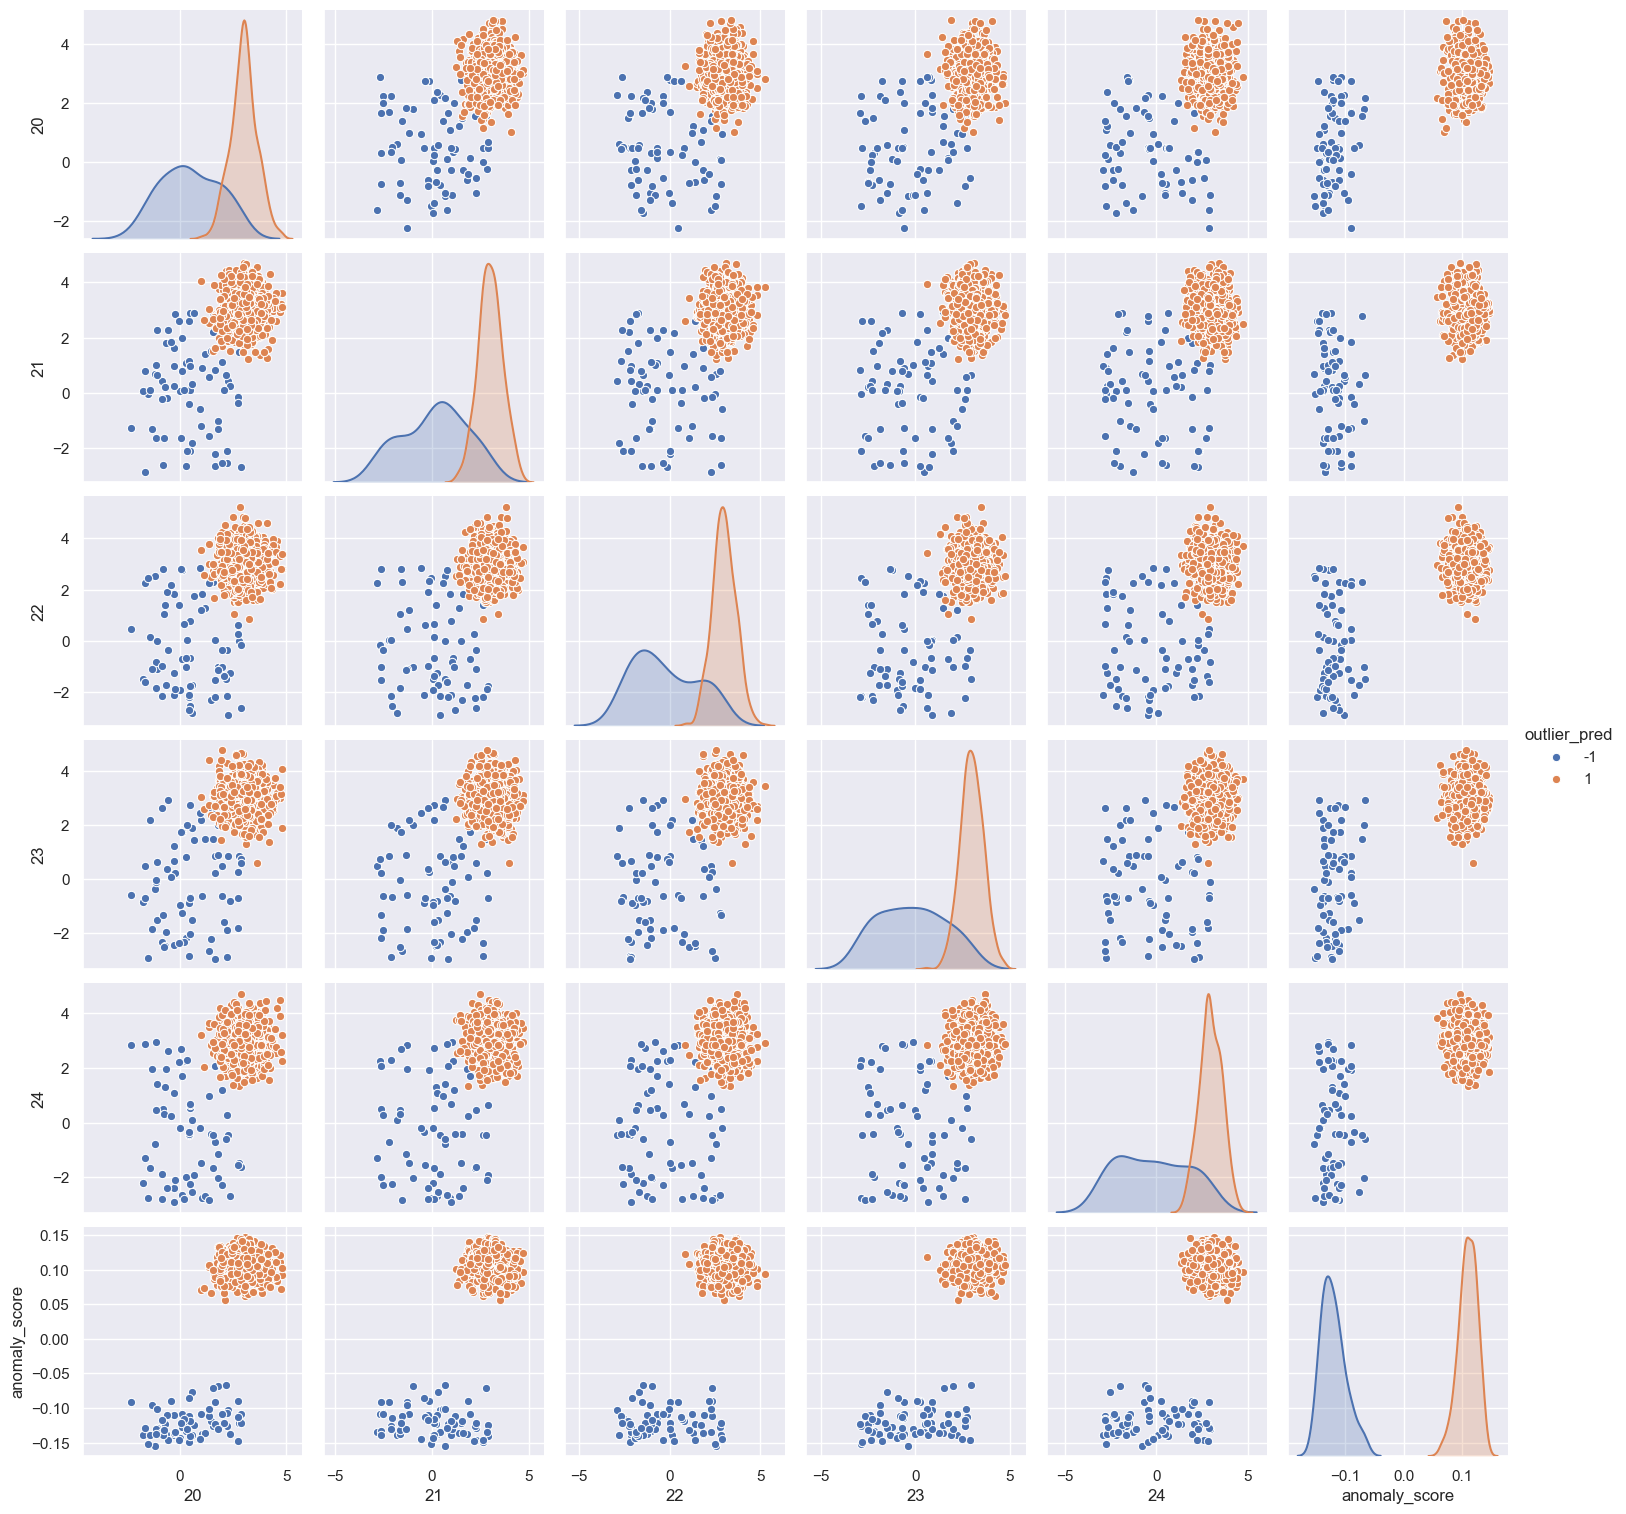

In [24]:
# Dispersão por Predição de Anomalia
df_scored_if_train = pd.merge(left=x_train, right=if_train,
                              how='left',
                              left_index=True, right_index=True)

sns.pairplot(
    df_scored_if_train.iloc[:, 20:],
    hue='outlier_pred'
);

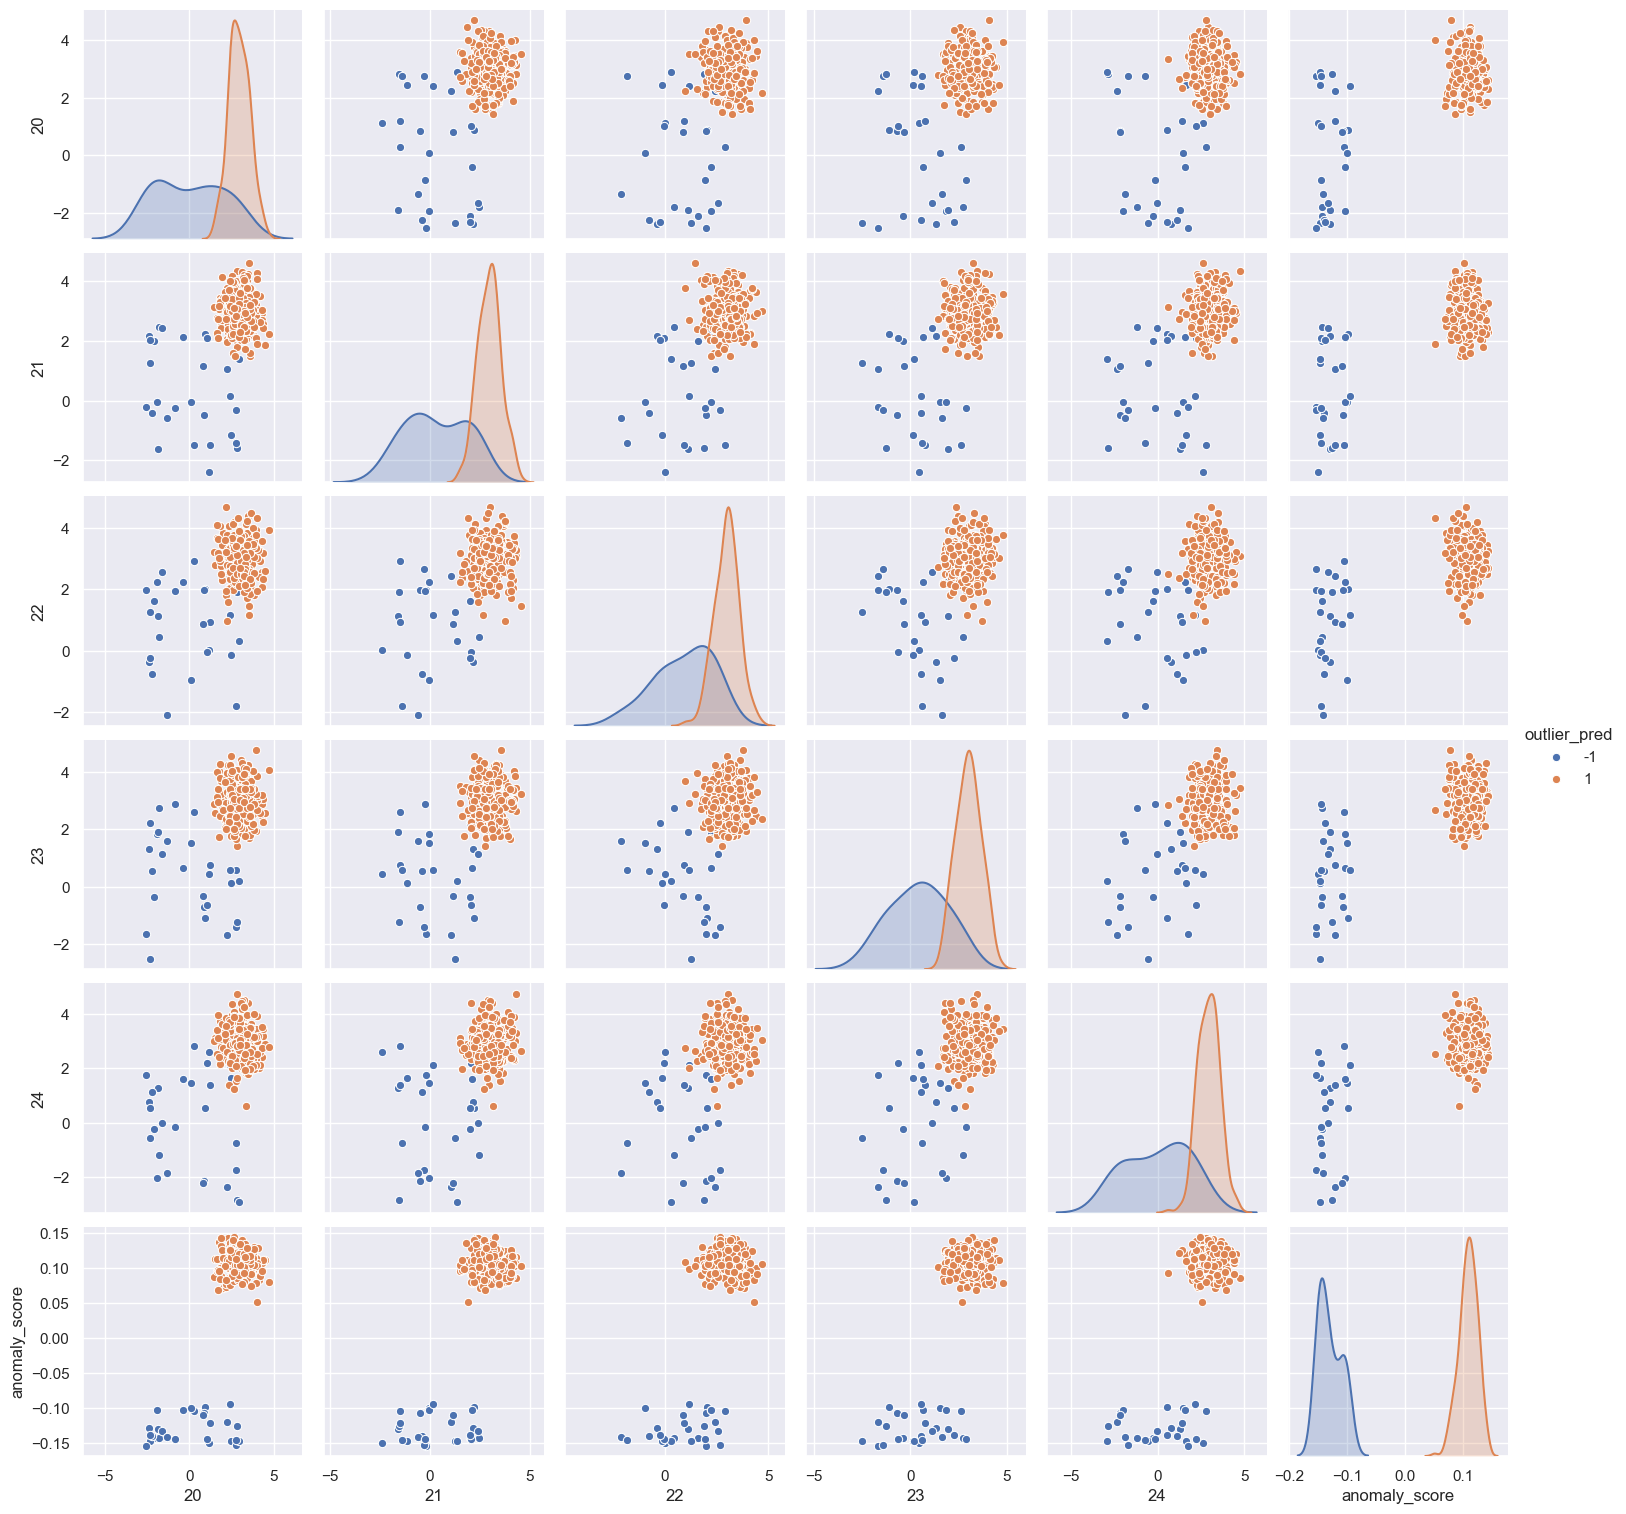

In [25]:
# Dispersão por Predição de Anomalia
df_scored_if_test = pd.merge(left=x_test, right=if_test,
                              how='left',
                              left_index=True, right_index=True)

sns.pairplot(
    df_scored_if_test.iloc[:, 20:],
    hue='outlier_pred'
);

# Desenvolvimento do Modelo: AutoEncoder

In [27]:
# Para utilizar esta biblioteca: pip install pyod==0.8.8
import pyod
from pyod.models.auto_encoder import AutoEncoder

In [29]:
# Definição da RNA AutoEncoder utilizando o pacote pyod
modelo_ae = AutoEncoder(hidden_neurons=[16,8,4,2,4,8,16], 
                        batch_size=32,
                        epochs=50)

# Treinamento da RNA
modelo_ae.fit(x_train_scaled)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                650       
_________________________________________________________________
dropout (Dropout)            (None, 25)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 25)                650       
_________________________________________________________________
dropout_1 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                416       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 1

AutoEncoder(batch_size=32, contamination=0.1, dropout_rate=0.2, epochs=50,
      hidden_activation='relu', hidden_neurons=[16, 8, 4, 2, 4, 8, 16],
      l2_regularizer=0.1,
      loss=<function mean_squared_error at 0x000001399E7778B0>,
      optimizer='adam', output_activation='sigmoid', preprocessing=True,
      random_state=None, validation_size=0.1, verbose=1)

In [30]:
modelo_ae.threshold_

10.103903106402049

## Aplicação do modelo nas bases de Treino e Teste

In [31]:
# Escoragem dos DataFrames de Treino e Teste
ae_train_anomaly_score = modelo_ae.decision_function(x_train_scaled)
ae_train_outlier_pred = modelo_ae.predict(x_train_scaled)

ae_test_anomaly_score = modelo_ae.decision_function(x_test_scaled)
ae_test_outlier_pred = modelo_ae.predict(x_test_scaled)

# Construção dos DataFrames de Resultados
ae_train = pd.concat([pd.DataFrame(ae_train_outlier_pred,
                                   columns=['outlier_pred'], 
                                   index=x_train.index),
                      pd.DataFrame(ae_train_anomaly_score, 
                                   columns=['anomaly_score'], 
                                   index=x_train.index)],
                     axis=1)

ae_test = pd.concat([pd.DataFrame(ae_test_outlier_pred,
                                  columns=['outlier_pred'], 
                                  index=x_test.index),
                     pd.DataFrame(ae_test_anomaly_score, 
                                  columns=['anomaly_score'], 
                                  index=x_test.index)],
                    axis=1)

In [32]:
ae_train

outlier_pred  anomaly_score
541             0       2.681002
440             0       2.519554
482             1      11.713521
422             0       2.136976
778             0       2.857161
..            ...            ...
106             0       3.308630
270             0       2.011071
860             0       2.635267
435             0       3.303270
102             0       2.616147

[700 rows x 2 columns]

## Avaliação dos Resultados

### Distribuição do Score de Anomalia

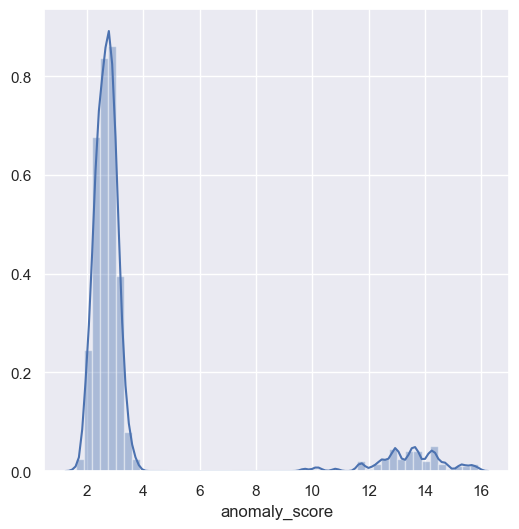

In [33]:
# Distribuição dos scores
sns.distplot(ae_train['anomaly_score']);

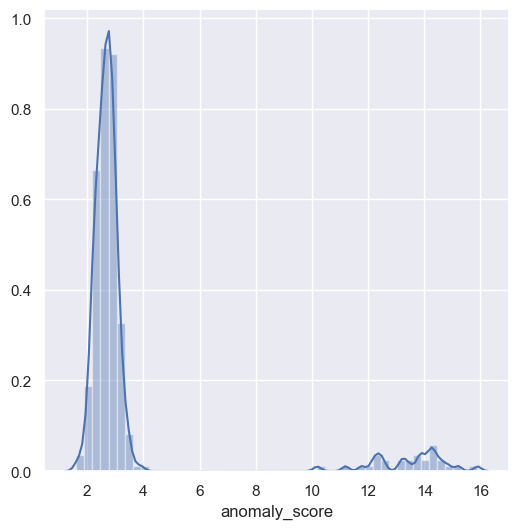

In [34]:
# Distribuição dos scores
sns.distplot(ae_test['anomaly_score']);

### Distribuição do Score de Anomalia por Classe de Predição

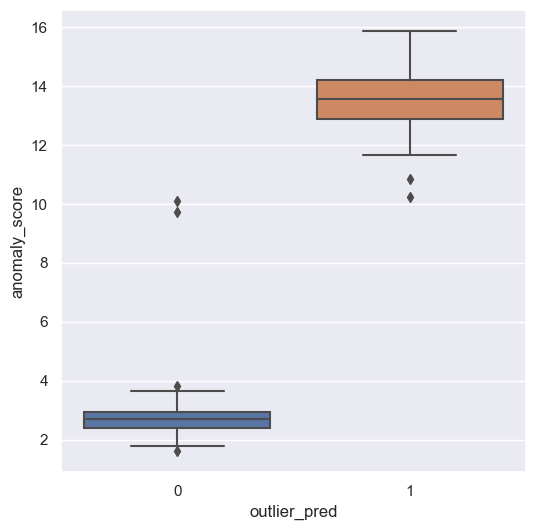

In [35]:
# Distribuição dos scores por classe de predição: Boxplot
sns.set(rc={'figure.figsize':(6,6)})

sns.boxplot(x='outlier_pred',
            y='anomaly_score',
            data=ae_train);

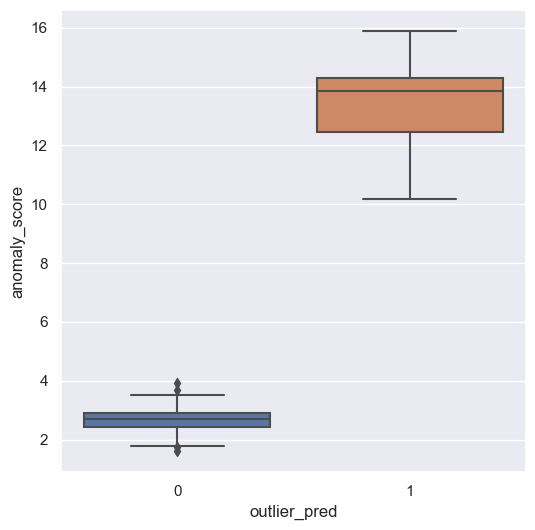

In [36]:
# Distribuição dos scores por classe de predição: Boxplot
sns.set(rc={'figure.figsize':(6,6)})

sns.boxplot(x='outlier_pred',
            y='anomaly_score',
            data=ae_test);

### Avaliação dos Resultados: Dispersão por Classe de Predição

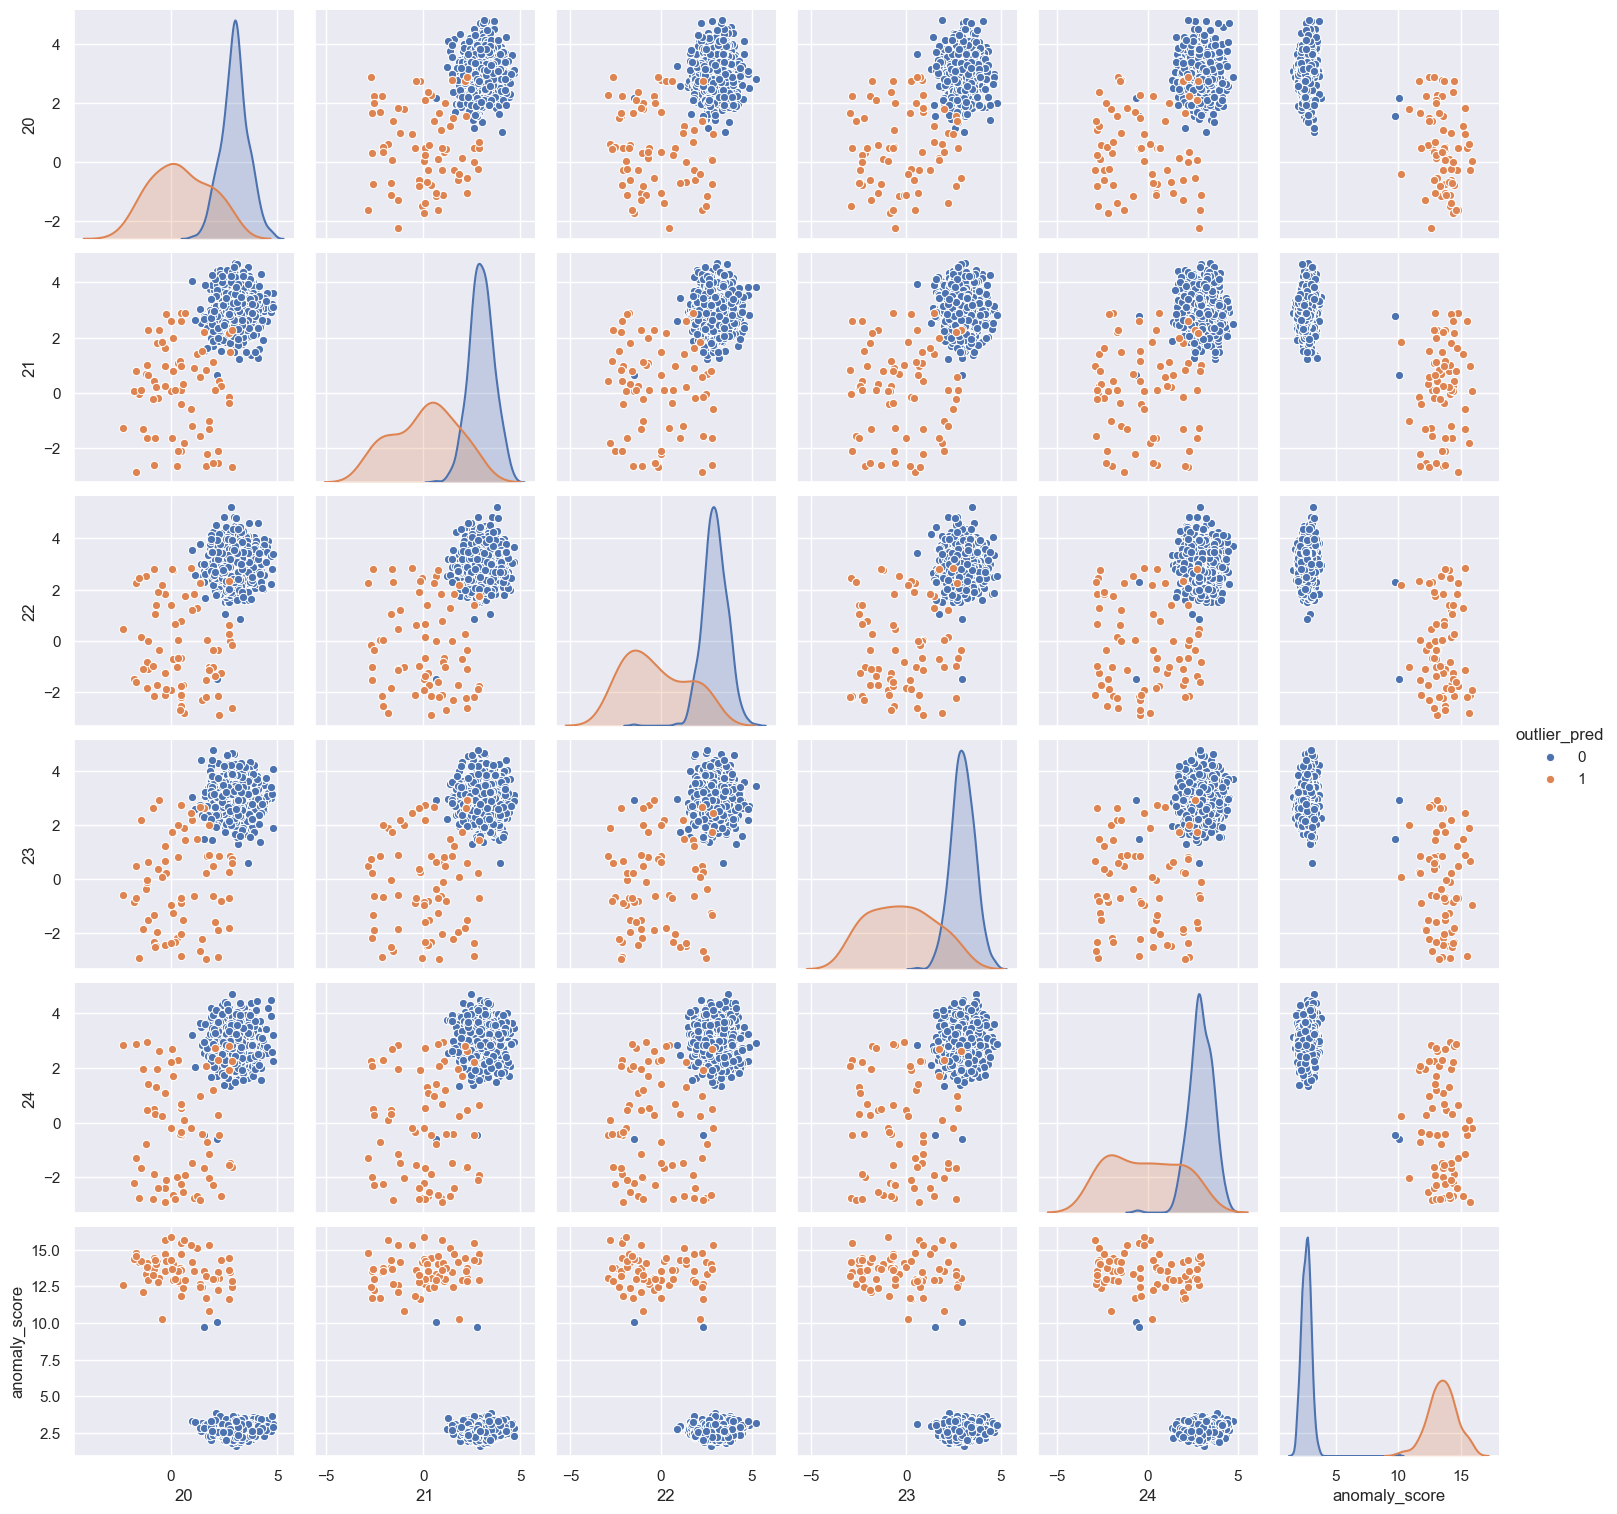

In [37]:
# Dispersão por Predição de Anomalia
df_scored_ae_train = pd.merge(left=x_train, right=ae_train,
                              how='left',
                              left_index=True, right_index=True)

sns.pairplot(
    df_scored_ae_train.iloc[:, 20:],
    hue='outlier_pred'
);

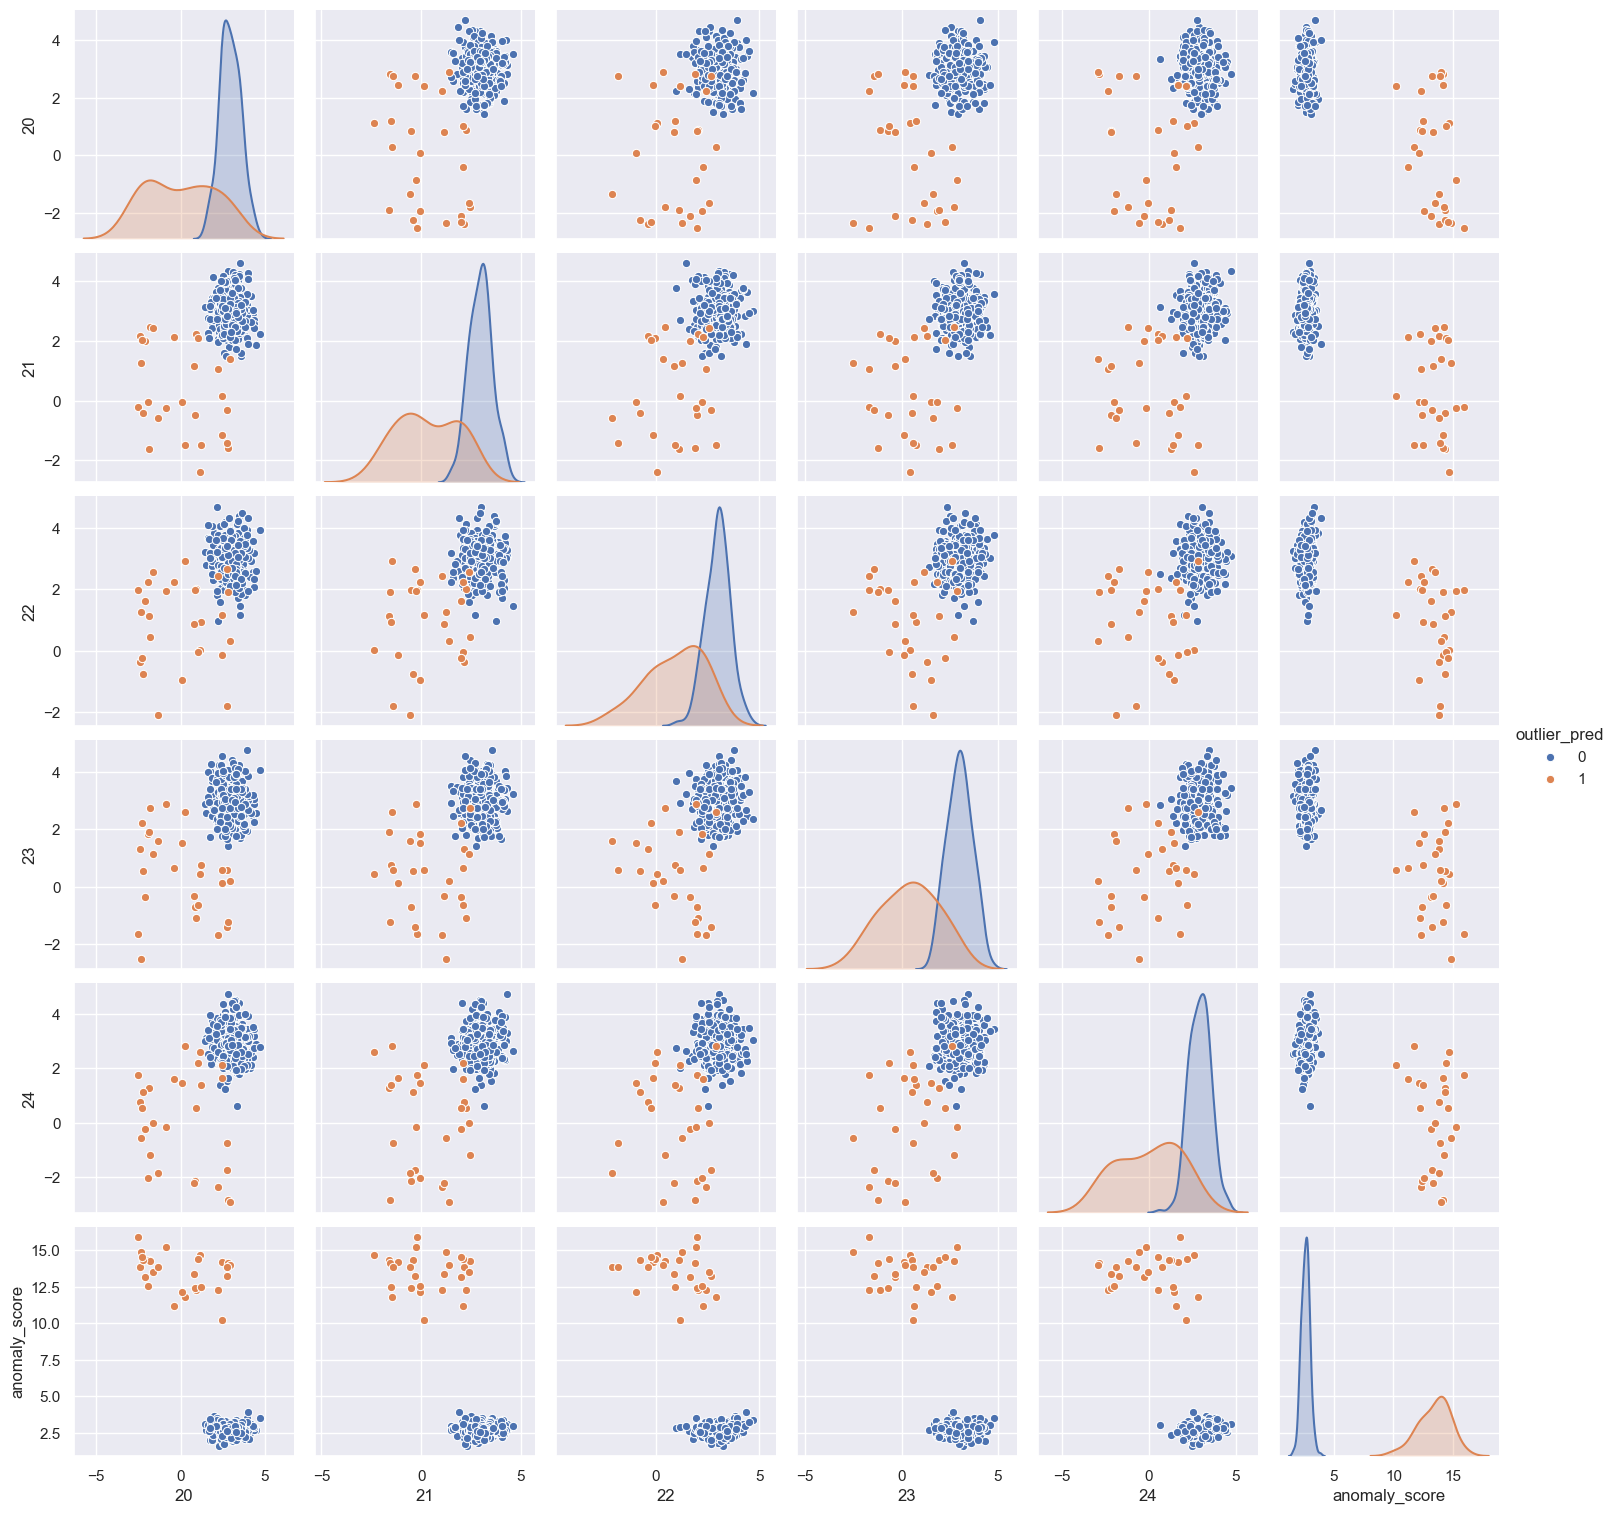

In [38]:
# Dispersão por Predição de Anomalia
df_scored_ae_test = pd.merge(left=x_test, right=ae_test,
                              how='left',
                              left_index=True, right_index=True)

sns.pairplot(
    df_scored_ae_test.iloc[:, 20:],
    hue='outlier_pred'
);